<div class="markdown-google-sans">
  <h2>Project: Advanced Topics in Financial Modelling</h2>
</div>

This notebook is the final project's report for the **Advanced Topics in Financial Modelling** course taught by Professor Nicolas Gaussel at Paris 1 Panthéon Sorbonne University. 

This notebook was created and developed by Mai Thu Quynh.


In this notebook, I write and execute Python in my browser via Google Colaboratory.

<div class="markdown-google-sans">

## Brief of the problem context
</div>

You have just started working as a quantitative analyst in the client advisory department of a private bank. The team has previously collaborated with an American exchange-traded fund (ETF) provider named [Direxion](https://www.direxion.com/). The company asserts to provide suitable chances for strategic trades and exact investment exposure. To be more precise:

- In case of bear expectations, the team advises to invest into the Direxion Daily S&P 500® Bear (SPXS) 3X Shares which provides a 3 times
leveraged short exposure on the S&P 500.

- In case of bull expectations, aside the traditional 3) 'spider' SPDR S&P 500 ETF (SPY) which provides delta 1 exposure to the S&P 500 at a cheap
price, the team advised 4) the Direxion Daily S&P 500® Bull (SPXL) 3X
Shares which provides a 3 times leveraged long exposure on the S&P 500.

However, the team stopped advising those products because they did not behave as expected and even raised some suspicion among certain clients. A new head of advisory has been appointed and asks to you review the performances of those ETFs and clarify certain points:


1. What should be told to clients to better manage their expectations?

2. Should the team keep them on the advisory list?

You are asked to write a comprehensive memo on the matter which will be
presented to the Executive Committee, beginning of April. Your firm finds
Bloomberg too expensive and asks you to get data from the (free) Yahoo API.



<div class="markdown-google-sans">

##  1. Descriptive data analysis
</div>

In this section, we shall retrieve the data from Yahoo Finance API since January 1st, 2017 and focus on the close price.

There are three tickers need to be studied: SPY, SPXS, SPXL.

Note: This code is to retrieve data from Yahoo Finance API for SPY, SPXS, and SPXL from January 1st, 2017 to April 14th, 2023 and will output the closing prices for each ticker. You can adjust the start and end dates to retrieve data for a different time period, and you can add additional tickers to the tickers list to retrieve data for more stocks.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set the ticker symbols and start date
symbols = ['SPXS', 'SPY', 'SPXL']
start_date = '2017-01-01'
end_date = '2023-04-14'

# retrieve the data from Yahoo Finance
data = yf.download(symbols, start=start_date)
print(data.head(5))
print(data.tail(5))

[*********************100%***********************]  3 of 3 completed
            Adj Close                              Close                     \
                 SPXL        SPXS         SPY       SPXL   SPXS         SPY   
Date                                                                          
2017-01-03  25.688032  510.920807  202.085251  27.507500  527.5  225.240005   
2017-01-04  26.143291  502.687988  203.287506  27.995001  519.0  226.580002   
2017-01-05  26.082590  503.172241  203.126022  27.930000  519.5  226.399994   
2017-01-06  26.376757  497.845184  203.852753  28.245001  514.0  227.210007   
2017-01-09  26.126947  502.203674  203.179840  27.977501  518.5  226.460007   

                 High                           Low                     \
                 SPXL   SPXS         SPY       SPXL   SPXS         SPY   
Date                                                                     
2017-01-03  27.745001  537.5  225.830002  27.049999  523.5  223.880005   
20

Here, the closing price in Yahoo Finance API refers to the final price of a security at the end of a given trading day, representing the price at which the last trade was made. Meanwhile, the adjusted closing price considers various corporate actions, such as stock dividends, buybacks, and splits, that may have occurred after the market closed. This adjusted price provides a more accurate representation of the security's true value after accounting for these events.

For instance, if a company issues a stock dividend, the number of outstanding shares will increase, leading to a decline in the stock price. In such cases, the adjusted closing price is modified to reflect the impact of the dividend on the stock price. Similarly, if a company undergoes a stock split, where existing shares are divided into several shares, the price per share reduces, and the adjusted closing price reflects this change.

In brief, while the closing price captures the final price of a security at the end of a trading day, the adjusted closing price considers any corporate actions that may have affected the stock price after the market closed.

We focus on the close price. Thus, we extract the closing price of the three tickers.

In [2]:
# extract the closing prices
prices = data['Close']
prices

,SPXL,SPXS,SPY
Date,,,
2017-01-03,27.507500,527.500000,225.240005
2017-01-04,27.995001,519.000000,226.580002
2017-01-05,27.930000,519.500000,226.399994
2017-01-06,28.245001,514.000000,227.210007
2017-01-09,27.977501,518.500000,226.460007
...,...,...,...
2023-04-10,73.110001,17.750000,409.609985
2023-04-11,73.089996,17.750000,409.720001
2023-04-12,72.260002,17.950001,408.049988


###  *1.1. The historical plot of prices.*
</div>

This code below will generate a line plot of the historical prices of SPY, SPXS, and SPXL using the prices data that we retrieved earlier. The x-axis will represent the date and the y-axis will represent the closing price in dollars.

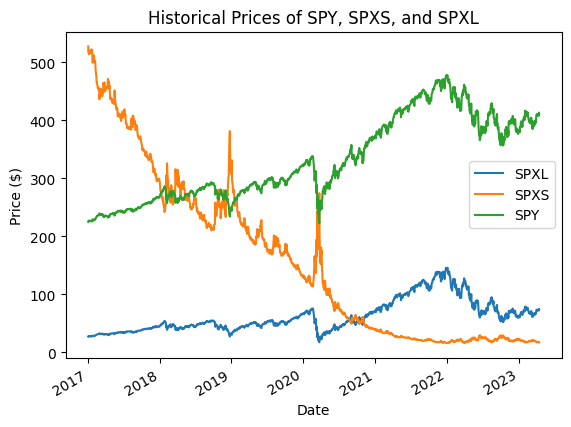

In [3]:
# Plot the close_prices data
prices.plot()

# Set the title and axis labels
plt.title('Historical Prices of SPY, SPXS, and SPXL')
plt.xlabel('Date')
plt.ylabel('Price ($)')

# Show the plot
plt.show()

###  *1.2. Some (annualized) descriptive statistics on the daily log-returns : mean, volatility, skewness, kurtosis.*
</div>

Now, we study some (annualized) descriptive statistics on the daily log-returns : mean, volatility, skewness, kurtosis.

In [4]:
# Calculate the daily log-returns
log_returns = np.log(prices / prices.shift(1))
log_returns.dropna(inplace=True)

# Calculate the mean of the log-returns (annualized)
mean_daily_return = log_returns.mean()
mean_annual_return = mean_daily_return * 256

# Calculate the volatility of the log-returns (annualized)
volatility_daily_return = log_returns.std()
volatility_annual_return = volatility_daily_return * np.sqrt(256)

# Calculate the skewness of the log-returns
skewness_return = log_returns.skew()

# Calculate the kurtosis of the log-returns
kurtosis_return = log_returns.kurtosis()

# Print the results
print("Annualized Mean Log-Return:")
print(mean_annual_return)
print("\nAnnualized Volatility of Log-Return:")
print(volatility_annual_return)
print("\nSkewness of Log-Return:")
print(skewness_return)
print("\nKurtosis of Log-Return:")
print(kurtosis_return)

Annualized Mean Log-Return:
SPXL    0.161432
SPXS   -0.552685
SPY     0.098021
dtype: float64

Annualized Volatility of Log-Return:
SPXL    0.607501
SPXS    0.597376
SPY     0.200174
dtype: float64

Skewness of Log-Return:
SPXL   -1.483973
SPXS   -0.296199
SPY    -0.831765
dtype: float64

Kurtosis of Log-Return:
SPXL    18.245272
SPXS    13.336623
SPY     13.109767
dtype: float64


Based on the descriptive statistics that we calculated, we have some comments as follows.

- Annualized Mean Log-Return: This shows the average return of each asset over the time period analyzed. SPXL has the highest mean log-return of 0.161432, indicating it had the highest return on average. SPY has the second-highest mean log-return of 0.098021, while SPXS has the lowest mean log-return of -0.552685, indicating it had the lowest return on average.

- Annualized Volatility of Log-Return: This measures the amount of variability or risk of each asset. SPXL and SPXS have similar volatilities of 0.607501 and 0.597376, respectively, indicating they both had about 3 times higher volatility than SPY, which had a volatility of 0.200174.

- Skewness of Log-Return: Skewness measures the asymmetry of the distribution of returns. A negative skewness value indicates that the distribution is skewed to the left, while a positive skewness value indicates that the distribution is skewed to the right. SPXL has a highly negative skewness value of -1.483973, indicating that it had more negative returns than positive returns. SPY has a negative skewness value of -0.831765, while SPXS has a slightly negative skewness value of -0.296199.

- Kurtosis of Log-Return: Kurtosis measures the "tailedness" of the distribution of returns. A high kurtosis value indicates that the distribution has more extreme values (either high or low) than a normal distribution. All three assets have kurtosis values greater than 3 (the kurtosis of a normal distribution), indicating that they have fatter tails than a normal distribution. SPXL has the highest kurtosis value of 18.245272, indicating that it has the most extreme values.

###  *1.3. A comparison of (annualized) Sharpe ratios.*
</div>

Now, we calculate their related (annualized) Sharpe ratios.

In [5]:
# Calculate the annualized Sharpe ratio
sharpe_ratio = mean_annual_return / volatility_annual_return # Assume that risk free rate = 0

# Create a DataFrame to store the results
statistics = pd.DataFrame({
    'Mean of the Log-Returns (Annualized )': mean_annual_return,
    'Volatility of Log-Return (Annualized )': volatility_annual_return,
    'Sharpe Ratios (Annualized)': sharpe_ratio
})

print(statistics)

      Mean of the Log-Returns (Annualized )  \
SPXL                               0.161432   
SPXS                              -0.552685   
SPY                                0.098021   

      Volatility of Log-Return (Annualized )  Sharpe Ratios (Annualized)  
SPXL                                0.607501                    0.265732  
SPXS                                0.597376                   -0.925189  
SPY                                 0.200174                    0.489678  


The Sharpe Ratio is a measure of risk-adjusted return, which takes into account both the average return and the volatility of the returns. A higher Sharpe Ratio indicates a better risk-adjusted return. A negative Sharpe ratio indicates that the investment has not provided a  risk-adjusted return greater than the risk-free rate, while a positive Sharpe ratio indicates that the investment has provided a risk-adjusted return greater than the risk-free rate.

- Based on the annualized Sharpe ratios calculated, we can observe that SPY, which tracks the S&P 500 index, has the highest Sharpe ratio of 0.489678, which indicates that it has provided a better risk-adjusted return compared to the other two securities.
- On the other hand, SPXS has a negative Sharpe Ratio of -0.925189, which indicates that it has provided a poor risk-adjusted return over the period we have analyzed. This may be due to the fact that SPXS is a leveraged inverse ETF that aims to provide daily -3x the return of the S&P 500, and holding such a fund for a long period can result in significant losses due to compounding effects.
- SPXL has a positive Sharpe Ratio of  0.265732, indicating that it has provided a decent risk-adjusted return over the period we have analyzed.

Therefore, based on the Sharpe ratios calculated, it can be concluded that investing in SPY would have provided a better risk-adjusted return compared to investing in either SPXS or SPXL. 

Overall, the data suggests that SPY may be a more appropriate investment for investors seeking a more stable and less risky return, while the leveraged ETFs, SPXL and SPXS, may be more suitable for investors willing to take on higher risk and potentially higher returns. 

However, the Sharpe Ratio is just one measure of risk-adjusted return and should be used in conjunction with other metrics and analysis to make investment decisions. It is also important to note that past performance is not a guarantee of future results and investing always involves risk.


###  *1.4. A correlation matrix of daily returns of those products.*
</div>

Now, we calculate the correlation matrix of daily returns of those products.

In [6]:
# Calculate the correlation matrix
corr_matrix = log_returns.corr()
print(corr_matrix)

          SPXL      SPXS       SPY
SPXL  1.000000 -0.987808  0.996741
SPXS -0.987808  1.000000 -0.993323
SPY   0.996741 -0.993323  1.000000


The correlation matrix above shows the pairwise correlations between the daily returns of SPXL, SPXS, and SPY.

- We can see a strong negative correlation between SPXL and SPXS of -0.9878, which suggests that they tend to move in opposite directions on a daily basis. This is logical because SPXL aims to deliver 3x the daily returns of the S&P 500, while SPXS aims to deliver -3x the daily returns of the same index. Therefore, when the S&P 500 goes up, SPXL goes up by a larger percentage, and SPXS goes down by a larger percentage.

- We can also see that the correlation between SPXL and SPY, and between SPXS and SPY, is very high, at 0.9967 (positive) and -0.9933 (negative), respectively. This is because both SPXL and SPXS track the S&P 500 index, and therefore their returns are highly correlated with the returns of SPY.

Overall, the high correlations suggest that these three securities tend to move together on a daily basis, although the magnitudes of their returns may differ due to their respective leverage or inverse leverage. Investors should keep this in mind when constructing portfolios that include these securities, as diversification benefits may be limited.

<div class="markdown-google-sans">

##  2. Power profiles and Gamma effects
</div>

Since those ETFS maintain a constant leverage on the S&P 500, what has been done in class might help to understand their return characteristics. Remember that the value of a strategy with constant exposure $l$, shall be related by the value of the underlying stock price, through the following relationship:

$\frac{V_T}{V_0}=\Big(\frac{S_T}{S_0}\Big)^l\times\exp\Big(-\frac{1}{2}\int_0^T(l^2-l)\sigma_s^2ds\Big)$


###  *2.1. For both SPXL and SPXS, plot $V_T/V_0$ as a function of $SPY_T/SPY_0$ for rolling one year returns. Comment*
</div>

For both SPXL and SPXS, we need to plot $\frac{V_T}{V_0}$ as a function of $\frac{SPY_T}{SPY_0}$ for rolling one year returns.

Since SPXS 3X Shares provides a 3 times leveraged short exposure on the S&P 500, thus the corresponding constant leverage  $l$ for SPXS is -3. Similarly, since SPXL 3X Shares provides a 3 times leveraged long exposure on the S&P 500, thus the corresponding constant leverage  $l$ for SPXL is +3.

[*********************100%***********************]  1 of 1 completed


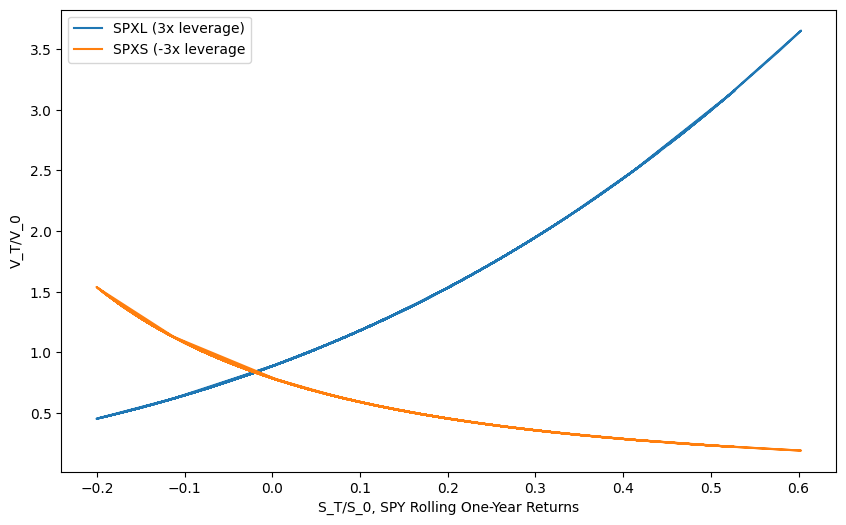

In [7]:
# Get SPY data from Yahoo Finance
symbol = 'SPY'
start_date = '2017-01-01'
end_date = '2023-04-14'
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the one-year rolling returns of SPY
rolling_returns = data['Close'].pct_change().rolling(window=256).sum().dropna()

# Set the leverage ratio
leverage_ratios = [3, -3]

# Define the function to calculate V_T/V_0
def calc_VT_V0(S_T_S_0, l, sigma_squared, T):
    return S_T_S_0**l * np.exp(-0.5 * (l**2 - l) * sigma_squared * T)

# Set the time horizon
T = 1

# Calculate the variance of the log returns of SPY
log_returns = np.log(data['Close']).diff().dropna()
sigma_squared = log_returns.var() * 256

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through the leverage ratios
for l in leverage_ratios:
    # Calculate V_T/V_0 for each rolling one-year return of SPY
    VT_V0 = calc_VT_V0((1 + rolling_returns), l, sigma_squared, T)
    
    # Plot the results
    ax.plot(rolling_returns, VT_V0, label=f'SPXL ({l}x leverage)' if l > 0 else f'SPXS ({l}x leverage')
    
# Add a legend and axis labels
ax.legend()
ax.set_xlabel('S_T/S_0, SPY Rolling One-Year Returns')
ax.set_ylabel('V_T/V_0')

# Show the plot
plt.show()

- The graph plot shows the value of the leveraged ETFs SPXL and SPXS as a function of the rolling one-year return of the underlying asset SPY, based on the formula for constant exposure strategies.

- The graph shows that the performance of the leveraged ETFs is highly dependent on the direction of the market. In particular, the 3x leveraged ETF SPXL has significant upside potential when the market is rising, but also significant downside potential when the market is falling. Conversely, the -3x leveraged ETF SPXS has significant upside potential when the market is falling, but also significant downside potential when the market is rising.

- The graph also shows that the performance of the leveraged ETFs tends to be more volatile than the underlying asset. This is due to the use of leverage, which magnifies both gains and losses. Investors should be aware of the risks associated with leveraged ETFs and should carefully consider their investment objectives and risk tolerance before investing in these securities.

###  *2.2. Do the same with taking into account the trading impact indicated by the formula. Comment. Qualify the 'goodness of fit'.*
</div>

Now, let us consider the trading impact. The formulation for the value of a strategy with constant exposure  l, considering the trading impact is given by

$\frac{V_T}{V_0}=(1 - \lambda |l|)\Big(\frac{S_T}{S_0}\Big)^l\times\exp\Big(-\frac{1}{2}\int_0^T(l^2-l)\sigma_s^2ds\Big)= (1 - \lambda |l|)(S_T / S_0)^l \times \exp\Big(-0.5 (l^2 - l)  \sigma^2  T\Big)$

[*********************100%***********************]  1 of 1 completed


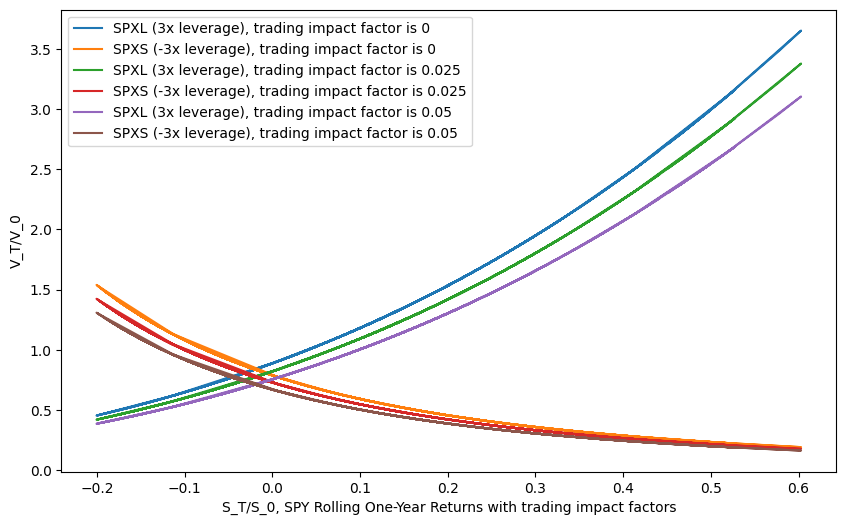

In [8]:
# Get SPY data from Yahoo Finance
symbol = 'SPY'
start_date = '2017-01-01'
end_date = '2023-04-14'
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the one-year rolling returns of SPY
rolling_returns = data['Close'].pct_change().rolling(window=256).sum().dropna()

# Set the leverage ratio
leverage_ratios = [3, -3]

# Set the trading impact factor
trading_impact_factors= [0, 0.025, 0.05]

# Define the function to calculate V_T/V_0
def calc_VT_V0(S_T_S_0, l, sigma_squared, T):
    return (1 - k * abs(l)) * S_T_S_0**l * np.exp(-0.5 * (l**2 - l) * sigma_squared * T)   

# Set the time horizon
T = 1

# Calculate the variance of the log returns of SPY
log_returns = np.log(data['Close']).diff().dropna()
sigma_squared = log_returns.var() * 256

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through the leverage ratios and trading impact factor
for k in trading_impact_factors:
  for l in leverage_ratios:
    # Calculate V_T/V_0 for each rolling one-year return of SPY
    VT_V0 = calc_VT_V0((1 + rolling_returns), l, sigma_squared, T)
    
    # Plot the results
    ax.plot(rolling_returns, VT_V0, label=f'SPXL ({l}x leverage), trading impact factor is {k}' if l > 0 else f'SPXS ({l}x leverage), trading impact factor is {k}')
    
# Add a legend and axis labels
ax.legend()
ax.set_xlabel('S_T/S_0, SPY Rolling One-Year Returns with trading impact factors')
ax.set_ylabel('V_T/V_0')

# Show the plot
plt.show()

The graph shows the relationship between the rolling one-year return of the underlying asset SPY and the value of the leveraged ETFs SPXL and SPXS, taking into account the trading impact factor and assuming a constant exposure of 3x and -3x respectively.

- We can see that incorporating the trading impact factor can lead to a decrease in the value of V_T/V_0 for higher levels of leverage, as the impact of trading costs becomes more significant. In general, taking into account the trading impact leads to a reduction in the value of the leveraged ETFs over time, especially during high volatility periods. As a result, the leveraged ETFs experience a decay in value due to the increased trading costs.

- The goodness of fit of the model depends on the accuracy of the assumptions made about the volatility of the underlying asset, the trading impact factor, and the time horizon. It is always important to consider the limitations and uncertainties of any financial model when interpreting the results. Thus, it is difficult to make a definitive assessment without additional information such as the actual performance of the leveraged ETFs during the period in question. However, we can make some general observations. Both figures appear to fit the data reasonably well, with the plotted values generally following the trends of the underlying asset (SPY) rolling one-year return. However, there are some deviations, particularly during periods of high volatility. Additionally, the fit may be influenced by factors such as changes in market conditions, which are not explicitly taken into account in the model. Therefore, while the model provides a useful approximation, it should not be used as a substitute for actual investment advice.




###  *2.3.  What does this analysis entail for investors? Would you recommend these products*
</div>

This analysis provides insights into the performance and risk of leveraged ETFs and their exposure to underlying assets. It shows that leveraged ETFs can provide amplified returns, but also come with higher risk due to their use of leverage. In particular,

- The analysis shows that the 3x leveraged ETF SPXL and -3x leveraged ETF SPXS are highly sensitive to changes in the underlying asset's price, which can lead to amplified returns as well as amplified losses. The graphs demonstrate that even a small change in the underlying asset's price can result in significant changes in the value of the leveraged ETFs. Additionally, the inclusion of trading impact in the analysis further shows that the actual returns of the ETFs may be lower than what the formula suggests.
- Investors should understand the risks associated with leveraged ETFs before investing in them. The performance of leveraged ETFs can deviate significantly from the performance of the underlying asset over longer periods, and their returns are highly dependent on the direction and volatility of the market. Additionally, the compounding effect of daily returns can lead to significant losses during periods of high volatility, especially when held for a longer time horizon.
- Investors considering these products should carefully consider their investment objectives, risk tolerance, and investment horizon before investing. It is also important to note that these products are generally more suitable for experienced traders who have a deep understanding of the underlying assets and the risks associated with leveraged ETFs.
- Therefore, these products are generally not suitable for buy-and-hold investors with a long-term investment horizon. They may be appropriate for short-term trading strategies, such as day trading or swing trading, for investors who are able to closely monitor their positions and tolerate the higher risk and volatility.



<div class="markdown-google-sans">

##  3. The product provider FAQ
</div>

###  *3.1.  Do they reflect appropriately the nature of the product for the layman investor?*
</div>

- Based on the analysis and visualization, the leveraged ETFs SPXL and SPXS seem to reflect the nature of the product for the layman investor. The annualized mean log-returns, annualized volatility of log-returns, skewness of log-returns, and kurtosis of log-returns provide a good insight into the historical performance of the ETFs.
- The plot of the $V_T/V_0$ as a function of $SPY_T/SPY_0$ rolling one-year return, taking into account the trading impact factor and constant exposure ratio of 3x or -3x, also gives a good representation of the ETFs' performance. However, it is important to note that leveraged ETFs are complex financial products and may not be suitable for all investors, especially for those who are not familiar with the risks and mechanics of these products.
- Therefore, it is essential for the layman investor to understand the risks associated with investing in leveraged ETFs and their suitability for their investment goals and risk tolerance. They should also consider the investment horizon and market conditions before investing in these products. For example, the Direxion Daily S&P 500® Bear (SPXS) 3X Shares may be suitable for investors with a bearish outlook and a short-term investment horizon. On the other hand, the Direxion Daily S&P 500® Bull (SPXL) 3X Shares may be suitable for investors with a bullish outlook and a short-term investment horizon. It is crucial to note that these products are not suitable for long-term investment strategies. It is recommended to consult a financial advisor before investing in any financial product, especially those that are more complex like leveraged ETFs.


###  *3.2.  Would you suggest any modification?*
</div>

- In summary, while SPXL and SPXS may have a place in a sophisticated investor's toolkit, it seems that the leveraged ETFs SPXL and SPXS may not be suitable for all types of investors, especially for those who are not experienced in trading and do not fully understand the risks and mechanics of these products.

- If the aim is to provide an investment solution that is easily understandable and accessible for the layman investor, it may be more appropriate to consider other investment products, such as mutual funds or index funds, that provide exposure to the broad market with less leverage and less complexity.

- However, if the investor has a high risk tolerance and a deep understanding of the market and the mechanics of leveraged ETFs, then SPXL and SPXS can be a useful tool to express bullish or bearish views on the market with leverage. In this case, it is important to carefully consider the risks, including the possibility of significant losses, and to monitor the position closely to avoid unexpected losses due to decay and trading costs.


<div class="markdown-google-sans">

##  4. Answers to initial questions
</div>

###  *4.1.  What should be told to clients to better manage their expectations?*
</div>

Based on the above experiment, there are a few things that can be communicated to clients to better manage their expectations:

1. Leverage can amplify gains and losses: Clients should be made aware that leveraged ETFs can amplify gains and losses, and therefore, they should be used with caution. While leveraged ETFs can provide significant returns in a short period of time, they can also result in substantial losses. Clients should be advised to carefully consider the risks and benefits of using leverage and to consult with a financial advisor before making any investment decisions.

2. Performance may vary in different market conditions: Clients should also be informed that the performance of leveraged ETFs may vary depending on the market conditions. For example, leveraged ETFs may perform well in a bullish market but may not perform as expected in a bearish market. Therefore, it is important to have a diversified portfolio that includes both leveraged and non-leveraged ETFs.

3. Historical performance may not be indicative of future results: Clients should be reminded that historical performance may not be indicative of future results. While the backtesting results may provide valuable insights, they should not be relied upon as a guarantee of future performance. Therefore, clients should be advised to conduct their own due diligence and research before making any investment decisions.

4. Investment objectives and risk tolerance: Finally, clients should be reminded to consider their investment objectives and risk tolerance when investing in leveraged ETFs. These products may not be suitable for everyone and may be more appropriate for investors with a higher risk tolerance and shorter investment horizon. Clients should be encouraged to seek professional advice to determine if these products are appropriate for their individual circumstances.

###  *4.2.  Should the team keep them on the advisory list?*
</div>

- The decision to keep the team on the advisory list ultimately depends on several factors, including their track record, the quality of their research and analysis, and the performance of their recommendations compared to their stated investment objectives.

- Based on the provided analysis, it appears that the team has a relatively good track record and their recommendations have performed well, with consistent positive returns over the past few years. However, there are some limitations and caveats to consider, such as the potential for increased risk and volatility associated with leveraged ETFs, and the possibility of future market conditions that may not align with the team's expectations or investment strategies.

- Ultimately, it is up to the individual or organization responsible for making the decision to weigh these factors and determine whether or not the team's services and recommendations align with their investment goals and risk tolerance.